In [1]:
import warnings
warnings.simplefilter(action='ignore')
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import gensim
import string
import pandas as pd
import numpy as np
import seaborn as sns

### Loading the data and getting basic idea

In [2]:
df = pd.read_csv("datajobs.csv")

In [3]:
df.head()

,Unnamed: 0,JobTitle,Company,Location,PostDate,ScrapeDate,JobSummary,JobDesc,Salary
0,0,Data Scientist,DELOS Aqua,Jakarta,Sedang merekrut,26-05-2022,Support data strategy and maintain data system...,\nAbout DELOS\nDELOS is a technology start-up ...,Rp. 10.000.000 - Rp. 45.000.000 per bulan
1,1,Data Scientist (Analytics),Grab,Jakarta,7 hari yang lalu,26-05-2022,Strong data visualization and storytelling ski...,\n\nJob Description: \n\nLife at Grab \nAt Gra...,NaN
2,2,Data Scientist,Sayurbox,Jakarta,30+ hari yang lalu,26-05-2022,Identify and address user data requirements us...,\n\nJob Description\n\n Be a part of Sayurbox ...,NaN
3,3,Senior Data Scientist - GoPay,GO-JEK,Jakarta,15 hari yang lalu,26-05-2022,We are looking for a data scientist to join ou...,\n\n\n\n\n\n\n\n\nLocation\n\n\n Jakar...,NaN
4,4,Data Scientist - Consumer Platform,GO-JEK,Jakarta,30+ hari yang lalu,26-05-2022,We oversee all things data and work to provide...,\n\n\n\n\n\n\n\n\nLocation\n\n\n Jakar...,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1335 non-null   int64 
 1   JobTitle    1335 non-null   object
 2   Company     1335 non-null   object
 3   Location    1335 non-null   object
 4   PostDate    1335 non-null   object
 5   ScrapeDate  1335 non-null   object
 6   JobSummary  1335 non-null   object
 7   JobDesc     1335 non-null   object
 8   Salary      80 non-null     object
dtypes: int64(1), object(8)
memory usage: 94.0+ KB


In [5]:
df.head()

,Unnamed: 0,JobTitle,Company,Location,PostDate,ScrapeDate,JobSummary,JobDesc,Salary
0,0,Data Scientist,DELOS Aqua,Jakarta,Sedang merekrut,26-05-2022,Support data strategy and maintain data system...,\nAbout DELOS\nDELOS is a technology start-up ...,Rp. 10.000.000 - Rp. 45.000.000 per bulan
1,1,Data Scientist (Analytics),Grab,Jakarta,7 hari yang lalu,26-05-2022,Strong data visualization and storytelling ski...,\n\nJob Description: \n\nLife at Grab \nAt Gra...,NaN
2,2,Data Scientist,Sayurbox,Jakarta,30+ hari yang lalu,26-05-2022,Identify and address user data requirements us...,\n\nJob Description\n\n Be a part of Sayurbox ...,NaN
3,3,Senior Data Scientist - GoPay,GO-JEK,Jakarta,15 hari yang lalu,26-05-2022,We are looking for a data scientist to join ou...,\n\n\n\n\n\n\n\n\nLocation\n\n\n Jakar...,NaN
4,4,Data Scientist - Consumer Platform,GO-JEK,Jakarta,30+ hari yang lalu,26-05-2022,We oversee all things data and work to provide...,\n\n\n\n\n\n\n\n\nLocation\n\n\n Jakar...,NaN


#### Clean Text Data (Job Summary and Job Description)

In [6]:
def clean_text(text):
    text = re.sub('[.?\",()|+*#&]+', '', text)
    text = re.sub('[:/]+', ' ', text)
    text = re.sub('job description', '', text)
    text = re.sub('job description ', '', text)
    text = re.sub('job description: ', '', text)
    text = re.sub('location ', '', text)
    text = re.sub('work type ', '', text)
    text = re.sub(r"it'll", "it will", text)
    text = re.sub(r"we'll", "we will", text)
    text = re.sub(r"wouldn\x89Ûªt", "would not", text)
    text = re.sub(r"We've", "We have", text)
    text = re.sub(r"he'll", "he will", text)
    text = re.sub(r"Y'all", "You all", text)
    text = re.sub(r"Weren't", "Were not", text)
    text = re.sub(r"Didn't", "Did not", text)
    text = re.sub(r"they'll", "they will", text)
    text = re.sub(r"they'd", "they would", text)
    text = re.sub(r"DON'T", "DO NOT", text)
    text = re.sub(r"That\x89Ûªs", "That is", text)
    text = re.sub(r"they've", "they have", text)
    text = re.sub(r"i'd", "I would", text)
    text = re.sub(r"should've", "should have", text)
    text = re.sub(r"Let's", "Let us", text)
    text = re.sub(r"you'd", "You would", text)
    text = re.sub(r"It's", "It is", text)
    text = re.sub(r"Ain't", "am not", text)
    text = re.sub(r"Haven't", "Have not", text)
    text = re.sub(r"Could've", "Could have", text)
    text = re.sub(r"youve", "you have", text)  
    text = re.sub(r"donå«t", "do not", text)
    
    return text

def data_cleaning(df):
    df = df.drop(columns=["Unnamed: 0"])
    dfNew = df.drop_duplicates()
    
    dfNew["JobSummary"] = dfNew["JobSummary"].str.lower()
    dfNew["JobSummary"] = dfNew["JobSummary"].apply(lambda x: re.sub('\n', '', x))
    dfNew["JobDesc"] = dfNew["JobDesc"].str.lower()
    dfNew["JobDesc"] = dfNew["JobDesc"].apply(lambda x: re.sub('\n', "", x))
    
    dfNew["JobSummary"] = dfNew["JobSummary"].str.lower()
    dfNew["JobSummary"] = dfNew["JobSummary"].apply(lambda x: re.sub('\n', '', x))
    dfNew["JobDesc"] = dfNew["JobDesc"].str.lower()
    dfNew["JobDesc"] = dfNew["JobDesc"].apply(lambda x: re.sub('\n', "", x))
    
    dfNew["UncleanedJobDesc"] = dfNew["JobDesc"]
    dfNew["UncleanedJobSummary"] = dfNew["JobSummary"]
    
    dfNew["JobDesc"] = dfNew["UncleanedJobDesc"].apply(lambda x: clean_text(x))
    dfNew["JobSummary"] = dfNew["UncleanedJobSummary"].apply(lambda x: clean_text(x))
    
    return dfNew

In [7]:
dfNew = data_cleaning(df)

In [8]:
dfNew.head()

,JobTitle,Company,Location,PostDate,ScrapeDate,JobSummary,JobDesc,Salary,UncleanedJobDesc,UncleanedJobSummary
0,Data Scientist,DELOS Aqua,Jakarta,Sedang merekrut,26-05-2022,support data strategy and maintain data system...,about delosdelos is a technology start-up solv...,Rp. 10.000.000 - Rp. 45.000.000 per bulan,about delosdelos is a technology start-up solv...,support data strategy and maintain data system...
1,Data Scientist (Analytics),Grab,Jakarta,7 hari yang lalu,26-05-2022,strong data visualization and storytelling ski...,life at grab at grab every grabber is guided...,NaN,"job description: life at grab at grab, every g...",strong data visualization and storytelling ski...
2,Data Scientist,Sayurbox,Jakarta,30+ hari yang lalu,26-05-2022,identify and address user data requirements us...,be a part of sayurbox data team to target bus...,NaN,job description be a part of sayurbox data tea...,identify and address user data requirements us...
3,Senior Data Scientist - GoPay,GO-JEK,Jakarta,15 hari yang lalu,26-05-2022,we are looking for a data scientist to join ou...,jakarta permanent ...,NaN,location jakarta work type ...,we are looking for a data scientist to join ou...
4,Data Scientist - Consumer Platform,GO-JEK,Jakarta,30+ hari yang lalu,26-05-2022,we oversee all things data and work to provide...,jakarta permanent ...,NaN,location jakarta work type ...,we oversee all things data and work to provide...


In [9]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 1334
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   JobTitle             1246 non-null   object
 1   Company              1246 non-null   object
 2   Location             1246 non-null   object
 3   PostDate             1246 non-null   object
 4   ScrapeDate           1246 non-null   object
 5   JobSummary           1246 non-null   object
 6   JobDesc              1246 non-null   object
 7   Salary               45 non-null     object
 8   UncleanedJobDesc     1246 non-null   object
 9   UncleanedJobSummary  1246 non-null   object
dtypes: object(10)
memory usage: 107.1+ KB


In [43]:
1335 - 1246

89

In [10]:
dfNew.head()

,JobTitle,Company,Location,PostDate,ScrapeDate,JobSummary,JobDesc,Salary,UncleanedJobDesc,UncleanedJobSummary
0,Data Scientist,DELOS Aqua,Jakarta,Sedang merekrut,26-05-2022,support data strategy and maintain data system...,about delosdelos is a technology start-up solv...,Rp. 10.000.000 - Rp. 45.000.000 per bulan,about delosdelos is a technology start-up solv...,support data strategy and maintain data system...
1,Data Scientist (Analytics),Grab,Jakarta,7 hari yang lalu,26-05-2022,strong data visualization and storytelling ski...,life at grab at grab every grabber is guided...,NaN,"job description: life at grab at grab, every g...",strong data visualization and storytelling ski...
2,Data Scientist,Sayurbox,Jakarta,30+ hari yang lalu,26-05-2022,identify and address user data requirements us...,be a part of sayurbox data team to target bus...,NaN,job description be a part of sayurbox data tea...,identify and address user data requirements us...
3,Senior Data Scientist - GoPay,GO-JEK,Jakarta,15 hari yang lalu,26-05-2022,we are looking for a data scientist to join ou...,jakarta permanent ...,NaN,location jakarta work type ...,we are looking for a data scientist to join ou...
4,Data Scientist - Consumer Platform,GO-JEK,Jakarta,30+ hari yang lalu,26-05-2022,we oversee all things data and work to provide...,jakarta permanent ...,NaN,location jakarta work type ...,we oversee all things data and work to provide...


In [11]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 1334
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   JobTitle             1246 non-null   object
 1   Company              1246 non-null   object
 2   Location             1246 non-null   object
 3   PostDate             1246 non-null   object
 4   ScrapeDate           1246 non-null   object
 5   JobSummary           1246 non-null   object
 6   JobDesc              1246 non-null   object
 7   Salary               45 non-null     object
 8   UncleanedJobDesc     1246 non-null   object
 9   UncleanedJobSummary  1246 non-null   object
dtypes: object(10)
memory usage: 107.1+ KB


#### Convert PostDate Format into Datetime

In [12]:
# Convert PostDate Format into Datetime
def convertpostDate():
    TempDf = dfNew.copy()
    TempDf["PostDate"] = TempDf["PostDate"].apply(lambda x: re.sub('[A-Za-z]', '', x))
    TempDf.loc[TempDf["PostDate"].str.contains("30+"), "PostDate"] = "30"
    TempDf.loc[TempDf["PostDate"]==" ", "PostDate"] = "0"
    TempDf["PostDate"] = TempDf["PostDate"].apply(lambda x: re.sub(' ', '', x))
    TempDf["PostDate"] = TempDf["PostDate"].astype(int)
    TempDf['PostDate'] = pd.to_datetime(TempDf['ScrapeDate'], format='%d-%m-%Y') -  pd.to_timedelta(TempDf['PostDate'], unit='d')
    return TempDf

In [13]:
dfNew = convertpostDate()
dfNew.head()

,JobTitle,Company,Location,PostDate,ScrapeDate,JobSummary,JobDesc,Salary,UncleanedJobDesc,UncleanedJobSummary
0,Data Scientist,DELOS Aqua,Jakarta,2022-05-26,26-05-2022,support data strategy and maintain data system...,about delosdelos is a technology start-up solv...,Rp. 10.000.000 - Rp. 45.000.000 per bulan,about delosdelos is a technology start-up solv...,support data strategy and maintain data system...
1,Data Scientist (Analytics),Grab,Jakarta,2022-05-19,26-05-2022,strong data visualization and storytelling ski...,life at grab at grab every grabber is guided...,NaN,"job description: life at grab at grab, every g...",strong data visualization and storytelling ski...
2,Data Scientist,Sayurbox,Jakarta,2022-04-26,26-05-2022,identify and address user data requirements us...,be a part of sayurbox data team to target bus...,NaN,job description be a part of sayurbox data tea...,identify and address user data requirements us...
3,Senior Data Scientist - GoPay,GO-JEK,Jakarta,2022-05-11,26-05-2022,we are looking for a data scientist to join ou...,jakarta permanent ...,NaN,location jakarta work type ...,we are looking for a data scientist to join ou...
4,Data Scientist - Consumer Platform,GO-JEK,Jakarta,2022-04-26,26-05-2022,we oversee all things data and work to provide...,jakarta permanent ...,NaN,location jakarta work type ...,we oversee all things data and work to provide...


### Exploratory Data Analysis of Data Frame
##### 1. Missing Values

In [14]:
pd.DataFrame(np.sum(dfNew.isnull()), columns=["Num of Null"])

,Num of Null
JobTitle,0
Company,0
Location,0
PostDate,0
ScrapeDate,0
JobSummary,0
JobDesc,0
Salary,1201
UncleanedJobDesc,0
UncleanedJobSummary,0


In [15]:
dfNew["Salary"] = dfNew["Salary"].fillna(0)

In [16]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 1334
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   JobTitle             1246 non-null   object        
 1   Company              1246 non-null   object        
 2   Location             1246 non-null   object        
 3   PostDate             1246 non-null   datetime64[ns]
 4   ScrapeDate           1246 non-null   object        
 5   JobSummary           1246 non-null   object        
 6   JobDesc              1246 non-null   object        
 7   Salary               1246 non-null   object        
 8   UncleanedJobDesc     1246 non-null   object        
 9   UncleanedJobSummary  1246 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 107.1+ KB


#### Distributions of Total Specific Jobs on each company

In [17]:
def numOfpositionEachCompany(position="All", limitNum=30):
    """Generate Bar Plot of Distributions of Num of Specific Position in each Company"""
    
    plt.figure(figsize=(7,8))
    if position == "All":  
        sum_of_each_company = dfNew["Company"].value_counts(ascending=False)[:limitNum]

    else:
        Tempdf = dfNew.copy()
        Tempdf["mask"] = Tempdf["JobTitle"].str.contains(position)
        masked_df = Tempdf.loc[Tempdf["mask"] == True]
    
        sum_of_each_company = masked_df["Company"].value_counts(ascending=False)[:limitNum]
        
    sns.barplot(x=sum_of_each_company.values, y=sum_of_each_company.index, color='green')
    plt.xlabel("Sum of Position Opened")
    plt.ylabel("Company")
    plt.title("Number of {} Positions Opened in each Company".format(position))
    

In [18]:
position = "Data Scientist"

In [19]:
plt.figure(figsize=(7,8))
if position == "All":  
    sum_of_each_company = dfNew["Company"].value_counts(ascending=False)[:30]

else:
    Tempdf = dfNew.copy()
    Tempdf["mask"] = Tempdf["JobTitle"].str.contains(position)
    masked_df = Tempdf.loc[Tempdf["mask"] == True]
    
    sum_of_each_company = masked_df["Company"].value_counts(ascending=False)[:30]

<Figure size 504x576 with 0 Axes>

In [20]:
pd.DataFrame(sum_of_each_company).reset_index()

,index,Company
0,GO-JEK,11
1,Sayurbox,4
2,Michael Page,4
3,Grab,4
4,DELOS Aqua,2
5,Monroe Consulting Group,2
6,FrieslandCampina,2
7,Pefindo Credit Bureau,2
8,Amartha,2
9,byOrange,2


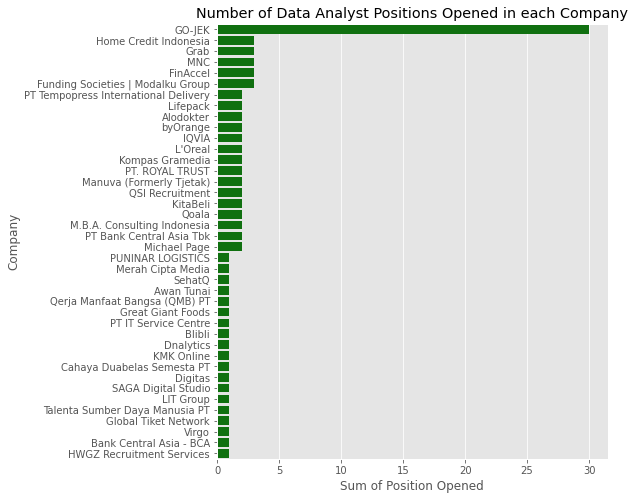

In [21]:
# Number of "Data Analyst" position
numOfpositionEachCompany("Data Analyst", 40)

#### Distribution of Positions Name across Company 

In [22]:
def NumofAllPosition(company='All', limitNum=30):
    plt.figure(figsize=(7,8))
    
    if company == 'All':
        sumOfEachPos = dfNew["JobTitle"].value_counts(ascending=False)[:limitNum]
        sns.barplot(x=sumOfEachPos.values, y=sumOfEachPos.index)
        plt.xlabel("Number of Company")
        plt.ylabel("Position")
        plt.title("Number of each Position Opened in All Company")
        
    else:
        maskedDf = dfNew.copy()
        sumOfEachPos = maskedDf.loc[maskedDf["Company"]==company, "JobTitle"].value_counts(ascending=False)[:limitNum]
        sns.barplot(x=sumOfEachPos.values, y=sumOfEachPos.index, color='blue')
        plt.xlabel("Number of Company")
        plt.ylabel("Position")
        plt.title("Number of Each Position in {}".format(company))

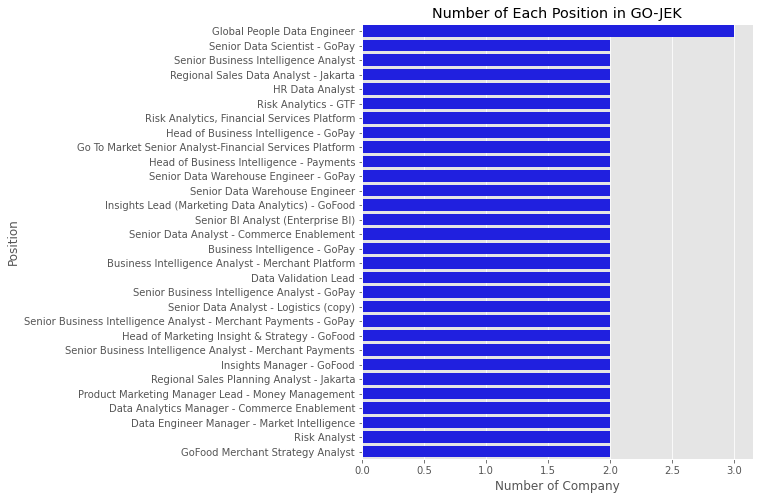

In [23]:
# Number of All Position Opened in Grab
NumofAllPosition("GO-JEK")

In [24]:
def JobsOpenedOverTime(position="All"):
    plt.figure(figsize=(10,7))
    if position == 'All':
        job_per_date = pd.DataFrame(dfNew["PostDate"].value_counts(ascending=False)).reset_index()
        job_per_date.columns = ["Date", "NumOfPositions"]
        job_per_date = job_per_date.sort_values(by="Date")

    else:
        maskedDf = dfNew.copy()
        maskedDf = maskedDf.loc[maskedDf["JobTitle"].str.contains(position),:]
        job_per_date = pd.DataFrame(maskedDf["PostDate"].value_counts(ascending=False)).reset_index()
        job_per_date.columns = ["Date", "NumOfPositions"]
        job_per_date = job_per_date.sort_values(by="Date")
        
    sns.lineplot(x="Date", y="NumOfPositions", data=job_per_date)
    plt.xticks(rotation=45)
    plt.ylabel("Number of Positions Opened")
    plt.title("Number of {} Positions Opened".format(position))
    plt.show()

In [25]:
position = "All"

In [26]:
if position == 'All':
        job_per_date = pd.DataFrame(dfNew["PostDate"].value_counts(ascending=False)).reset_index()
        job_per_date.columns = ["Date", "NumOfPositions"]
        job_per_date = job_per_date.sort_values(by="Date")

else:
    maskedDf = dfNew.copy()
    maskedDf = maskedDf.loc[maskedDf["JobTitle"].str.contains(position),:]
    job_per_date = pd.DataFrame(maskedDf["PostDate"].value_counts(ascending=False)).reset_index()
    job_per_date.columns = ["Date", "NumOfPositions"]
    job_per_date = job_per_date.sort_values(by="Date")

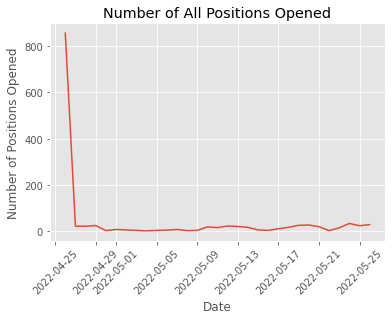

In [27]:
sns.lineplot(x="Date", y="NumOfPositions", data=job_per_date)
plt.xticks(rotation=45)
plt.ylabel("Number of Positions Opened")
plt.title("Number of {} Positions Opened".format(position))
plt.show()

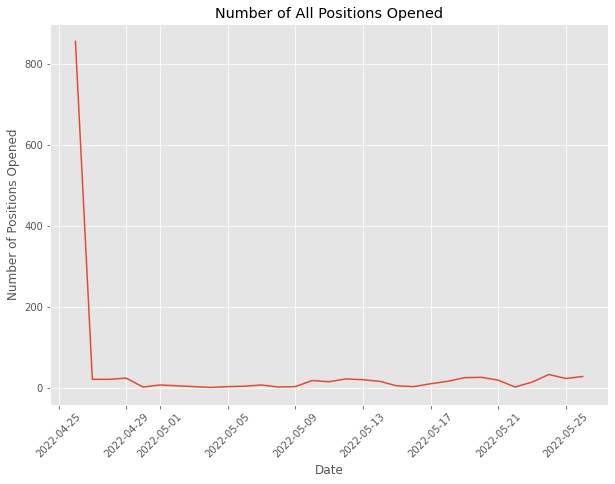

In [28]:
# Number of Data Analyst Positions Opened Over time
JobsOpenedOverTime('All')

#### Distribution of Number of Words of Job Description in each positions

In [29]:
def NumofWordJobDesc(count_type, pos1, pos2, pos3):
    """Count Type : Number of Word, Unique Word Count, Stop Word Count, Mean Word Length, Punctuation Count"""
    
    fig, ax = plt.subplots(2,2, figsize=(10,10))
    # Word Count
    if count_type == 'Number of Word':
        len_pos_0 = dfNew['JobDesc'].str.split().map(lambda x: len(x))
        len_pos_1 = dfNew[dfNew["JobTitle"]==pos1]['JobDesc'].str.split().map(lambda x: len(x))
        len_pos_2 = dfNew[dfNew["JobTitle"]==pos2]['JobDesc'].str.split().map(lambda x: len(x))
        len_pos_3 = dfNew[dfNew["JobTitle"]==pos3]['JobDesc'].str.split().map(lambda x: len(x))
    # Stop Word Count
    elif count_type == 'Unique Word Count':
        len_pos_0 = dfNew['JobDesc'].str.split().map(lambda x: len(x))
        len_pos_1 = dfNew[dfNew["JobTitle"]==pos1]['JobDesc'].apply(lambda x: len(set(str(x).split())))
        len_pos_2 = dfNew[dfNew["JobTitle"]==pos2]['JobDesc'].apply(lambda x: len(set(str(x).split())))
        len_pos_3 = dfNew[dfNew["JobTitle"]==pos3]['JobDesc'].apply(lambda x: len(set(str(x).split())))
    # Stopword Word Count
    elif count_type == 'Stop Word Count':
        len_pos_0 = dfNew['JobDesc'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
        len_pos_1 = dfNew[dfNew["JobTitle"]==pos1]['JobDesc'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
        len_pos_2 = dfNew[dfNew["JobTitle"]==pos2]['JobDesc'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
        len_pos_3 = dfNew[dfNew["JobTitle"]==pos3]['JobDesc'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
    # Mean Word Length
    elif count_type == 'Mean Word Length':
        len_pos_0 = dfNew['JobDesc'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
        len_pos_1 = dfNew[dfNew["JobTitle"]==pos1]['JobDesc'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
        len_pos_2 = dfNew[dfNew["JobTitle"]==pos2]['JobDesc'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
        len_pos_3 = dfNew[dfNew["JobTitle"]==pos3]['JobDesc'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    # Punctuation Count
    elif count_type == "Punctuation Count":
        len_pos_0 = dfNew['JobDesc'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
        len_pos_1 = dfNew[dfNew["JobTitle"]==pos1]['JobDesc'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
        len_pos_2 = dfNew[dfNew["JobTitle"]==pos2]['JobDesc'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
        len_pos_3 = dfNew[dfNew["JobTitle"]==pos3]['JobDesc'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
        
    sns.distplot(len_pos_0, ax=ax[0,0], color='purple')
    ax[0,0].set_title('{} of All job Description'.format(count_type), fontsize=10)                  
    sns.distplot(len_pos_1, ax=ax[0,1], color='blue')
    ax[0,1].set_title('{} of {} job Description'.format(count_type, pos1), fontsize=10)
    sns.distplot(len_pos_2, ax=ax[1,0], color='red')
    ax[1,0].set_title('{} of {} job Description'.format(count_type, pos2), fontsize=10)
    sns.distplot(len_pos_3, ax=ax[1,1], color='green')
    ax[1,1].set_title('{} of {} job Description'.format(count_type, pos3), fontsize=10)                

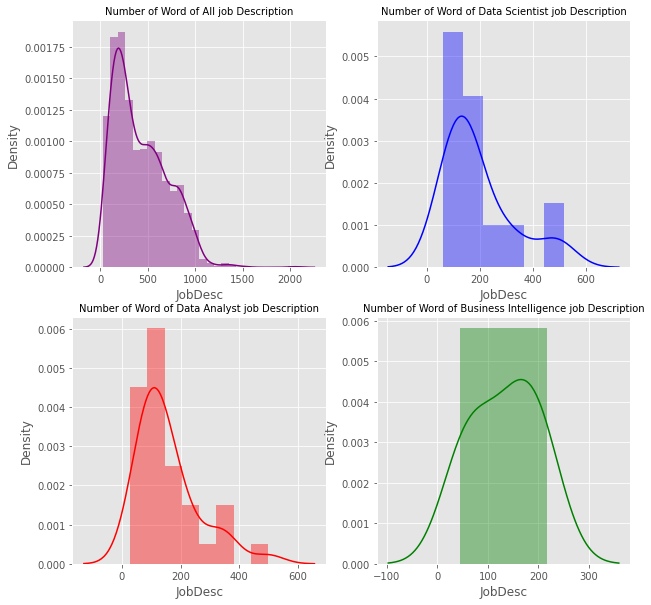

In [30]:
# Number of Word from Job Description in All jobs, Data Scientist, Data Analyst, and Business Intelligence Positions
NumofWordJobDesc('Number of Word', 'Data Scientist', 'Data Analyst', 'Business Intelligence')

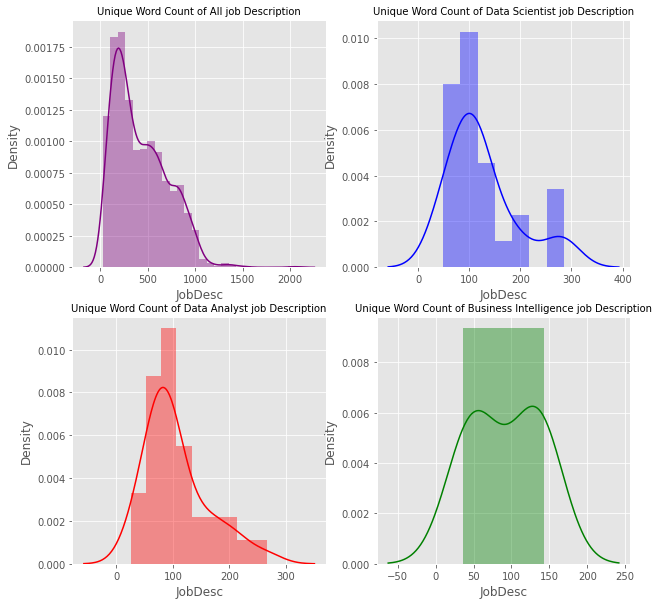

In [31]:
# Unique Word Count from Job Description in All jobs, Data Scientist, Data Analyst, and Business Intelligence Positions
NumofWordJobDesc('Unique Word Count', 'Data Scientist', 'Data Analyst', 'Business Intelligence')

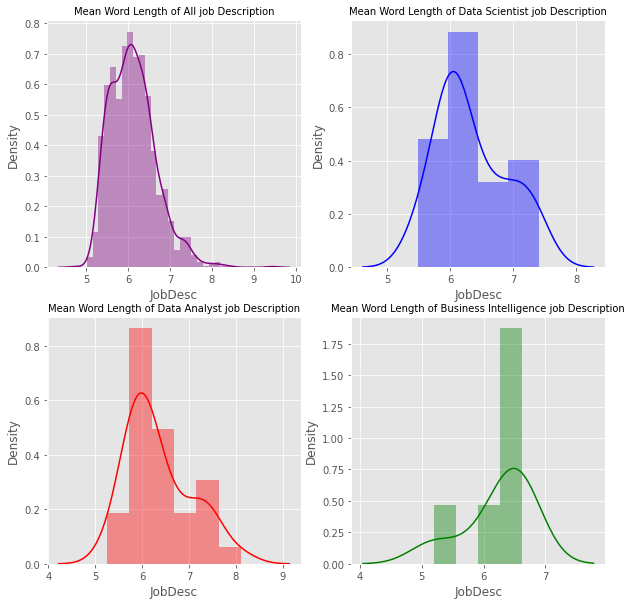

In [32]:
# Number of Stop Word from Job Description in All jobs, Data Scientist, Data Analyst, and Business Intelligence Positions
NumofWordJobDesc('Mean Word Length', 'Data Scientist', 'Data Analyst', 'Business Intelligence')

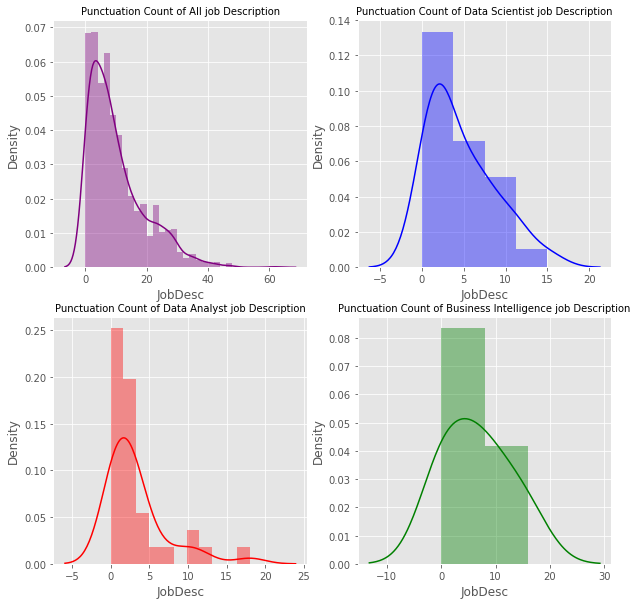

In [33]:
# Number of Punctuation Count from Job Description in All jobs, Data Scientist, Data Analyst, and Business Intelligence Positions
NumofWordJobDesc('Punctuation Count', 'Data Scientist', 'Data Analyst', 'Business Intelligence')

In [34]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

def generate_ngrams_bar(position='All', n_gram=1):
    if position == 'All':
        dfNewMasked = dfNew.copy()
    else:
        dfNewMasked = dfNew[df["JobTitle"].str.contains(position)]
    # Unigrams
    if n_gram == 1:
        n = 'uni'
        jobdesc_unigrams = defaultdict(int)

        for text in dfNewMasked['JobDesc']:
            for word in generate_ngrams(text):
                jobdesc_unigrams[word] += 1

        dfNew_jobdesc_ngrams = pd.DataFrame(sorted(jobdesc_unigrams.items(), key=lambda x: x[1])[::-1])
    # Bigrams
    elif n_gram == 2:
        n = 'bi'
        jobdesc_bigrams = defaultdict(int)

        for text in dfNewMasked['JobDesc']:
            for word in generate_ngrams(text, n_gram=2):
                jobdesc_bigrams[word] += 1

        dfNew_jobdesc_ngrams = pd.DataFrame(sorted(jobdesc_bigrams.items(), key=lambda x: x[1])[::-1])
    # Trigrams
    elif n_gram == 3:
        n = 'tri'
        jobdesc_trigrams = defaultdict(int)

        for text in dfNewMasked['JobDesc']:
            for word in generate_ngrams(text, n_gram=3):
                jobdesc_trigrams[word] += 1

        dfNew_jobdesc_ngrams = pd.DataFrame(sorted(jobdesc_trigrams.items(), key=lambda x: x[1])[::-1])
    
    N = 100 
    fig, axes = plt.subplots(figsize=(18, 50), dpi=100)
    plt.tight_layout()

    sns.barplot(y=dfNew_jobdesc_ngrams[0].values[:N], x=dfNew_jobdesc_ngrams[1].values[:N], color='red')
    
    axes.spines['right'].set_visible(False)
    axes.set_xlabel('')
    axes.set_ylabel('')
    axes.tick_params(axis='x', labelsize=13)
    axes.tick_params(axis='y', labelsize=13)

    axes.set_title('Top {} most common {}grams in {} Job Description'.format(N, n, position), fontsize=15)

    plt.show()

In [38]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

def generate_ngrams_bar2(position='All', n_gram=1):
    if position == 'All':
        dfNewMasked = dfNew.copy()
    else:
        dfNewMasked = dfNew[df["JobTitle"].str.contains(position)]
    # Unigrams
    if n_gram == 1:
        n = 'uni'
        jobdesc_unigrams = defaultdict(int)

        for text in dfNewMasked['JobDesc']:
            for word in generate_ngrams(text):
                jobdesc_unigrams[word] += 1

        dfNew_jobdesc_ngrams = pd.DataFrame(sorted(jobdesc_unigrams.items(), key=lambda x: x[1])[::-1])
    # Bigrams
    elif n_gram == 2:
        n = 'bi'
        jobdesc_bigrams = defaultdict(int)

        for text in dfNewMasked['JobDesc']:
            for word in generate_ngrams(text, n_gram=2):
                jobdesc_bigrams[word] += 1

        dfNew_jobdesc_ngrams = pd.DataFrame(sorted(jobdesc_bigrams.items(), key=lambda x: x[1])[::-1])
    # Trigrams
    elif n_gram == 3:
        n = 'tri'
        jobdesc_trigrams = defaultdict(int)

        for text in dfNewMasked['JobDesc']:
            for word in generate_ngrams(text, n_gram=3):
                jobdesc_trigrams[word] += 1

        dfNew_jobdesc_ngrams = pd.DataFrame(sorted(jobdesc_trigrams.items(), key=lambda x: x[1])[::-1])
        
    dfNew_jobdesc_ngrams.columns = ['ngrams', 'counts']
    
    return dfNew_jobdesc_ngrams

In [39]:
ppp = generate_ngrams_bar2()

In [42]:
ppp.iloc[:100]

,ngrams,counts
0,data,5750
1,business,4049
2,team,3211
3,experience,2595
4,will,2575
...,...,...
95,opportunity,522
96,well,512
97,leading,508
98,systems,505


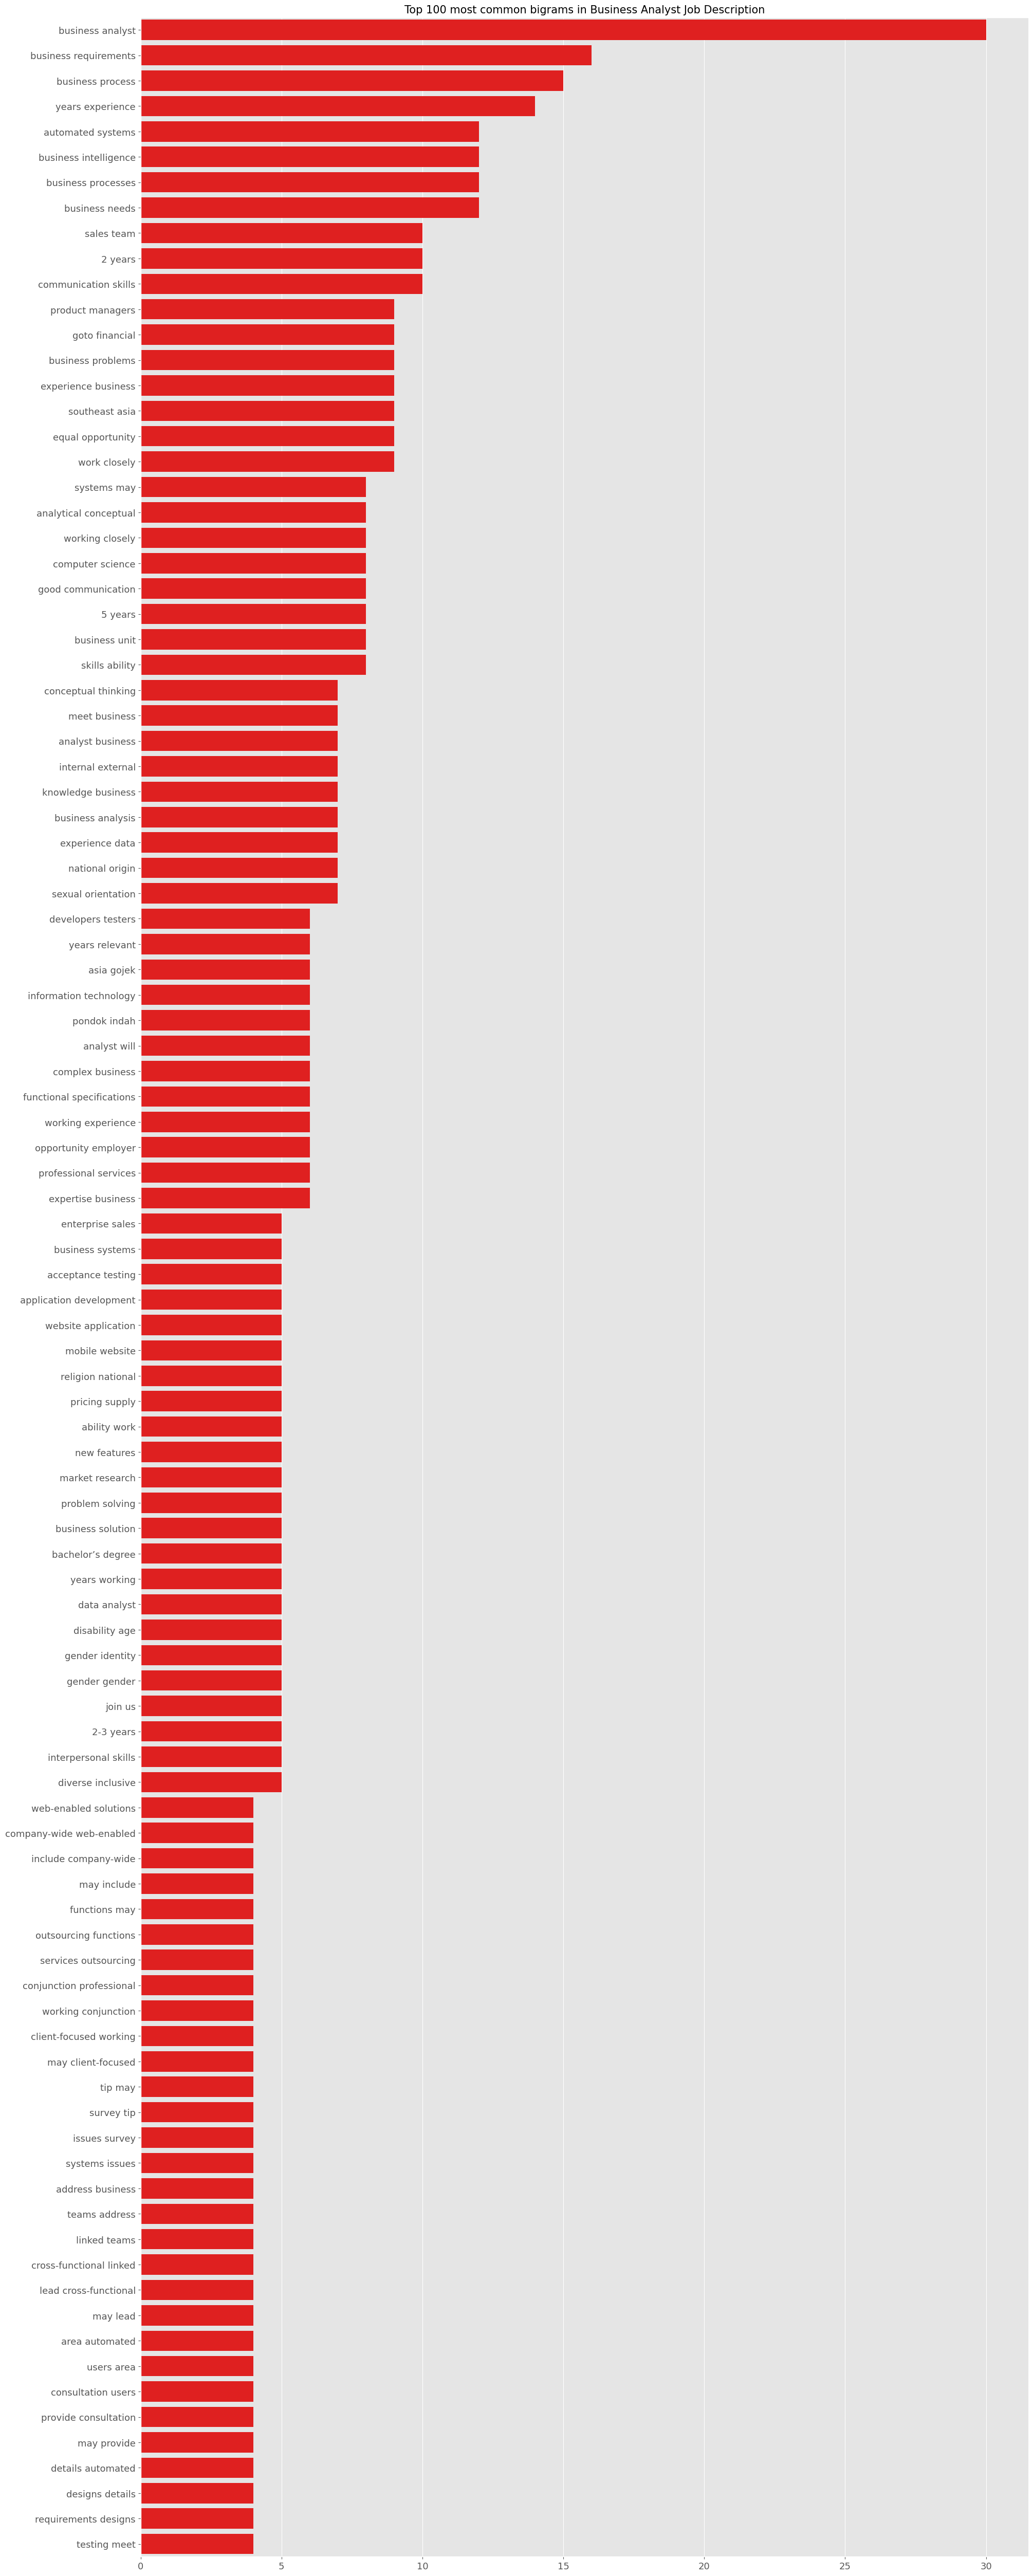

In [130]:
generate_ngrams_bar('Business Analyst', n_gram=2)

#### Generate Wordcloud

In [92]:
def gen_wordcloud(position='All'):
    if position == 'All':
        words_per_jobdesc = dfNew["JobDesc"]
    else:
        words_per_jobdesc = dfNew[dfNew["JobTitle"].str.contains(position)]["JobDesc"]
    all_jobdesc = []

    for row in words_per_jobdesc:
        row = np.array(row)
        mask = row != ''
        row = row[mask]
        all_jobdesc.append(row)
        
    jobdesc = [" ".join(text) for text in all_jobdesc]
    final_jobdesc = " ".join(jobdesc)
    
    wordcloud_jobdesc = WordCloud(background_color="white").generate(final_jobdesc)

    plt.figure(figsize = (20,20))
    plt.imshow(wordcloud_jobdesc, interpolation='None')
    plt.title("{} Job Description WordCloud".format(position))
    plt.axis("off")
    plt.show()

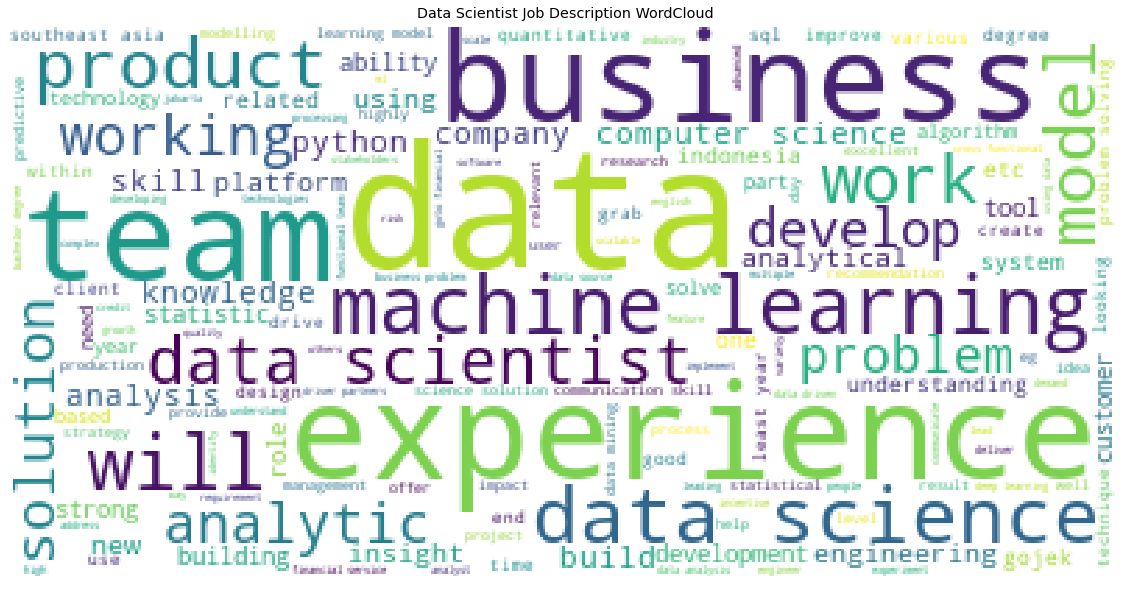

In [93]:
# Data Scientist WordCloud
gen_wordcloud('Data Scientist')

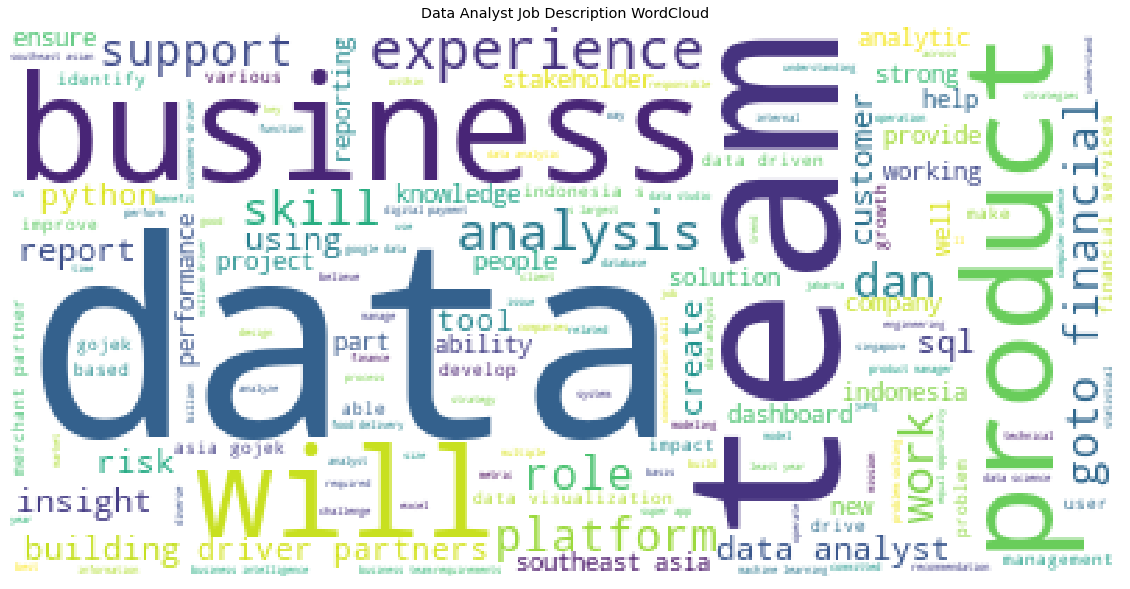

In [94]:
# Data Analyst WordCloud
gen_wordcloud('Data Analyst')

#### Create Topic Modelling on Job Description

In [70]:
# Topic Modelling on 

ModuleNotFoundError: No module named 'WordCloud'

In [116]:
company_list = list(df["Company"].unique())
company_list.insert(0, "All")

In [120]:
company_list

['All',
 'DELOS Aqua',
 'Grab',
 'Sayurbox',
 'GO-JEK',
 'Binar Academy - External Project',
 'Mekari (PT. Mid Solusi Nusantara)',
 'PT. Bank Mega Tbk.',
 'PT Prodia Widyahusada Tbk. (Prodia)',
 'PT. PRIMA VISTA SOLUSI',
 'PGI Data',
 'PT Asuransi Allianz Life Indonesia',
 'Jaris & K',
 'Agriaku',
 'McKinsey & Company',
 'Sonar Social Media Monitoring Platform',
 'Johnson & Johnson',
 'PT Majoo Teknologi Indonesia',
 'Monroe Consulting Group',
 'NTT INDONESIA TECHNOLOGY',
 'Cybertrend',
 'Home Credit',
 'FinAccel',
 'Dnalytics',
 'Indodana',
 'KoinWorks',
 'byOrange',
 'Home Credit Indonesia',
 'GudangAda',
 'NTT Ltd',
 'Accenture',
 'SIMGROUP',
 'PT Kamoro Maxima Integra',
 'PT Adicipta Inovasi Teknologi',
 'Micron Semiconductor Asia Operations Pte. Ltd',
 'ABeam Consulting Indonesia',
 'Awan Tunai',
 'HappyFresh',
 'Prodia',
 'iZeno',
 'Global Talentlytica',
 'Mitraplus',
 'JULO',
 'Amartha',
 'Kalibrr',
 'Zenius Education',
 'Algoritma',
 'Pefindo Credit Bureau',
 'IBM',
 'PT Bank C